## Tarea 1 - Beer Clustering
### Reconocimiento de patrones en Minería de Datos

Para esta tarea se realizara la implementación de los algoritmos de clustering: *K-means, Minibatch K-means, HAC Complete, DBSCAN* para el análisis de las reseñas obtenidos de la página beeradvocate la cual consta de un poco más de un millón y medio de datos como el dataset de prueba de los algoritmos, en los cuales se estudiara los valores de entrada de cada uno para obtener los clusters más adecuados.

# Caracterización del dataset
El data set consta de 13 atributos los cuales son:

<table class="tg">
  <tr>
    <th class="tg-yw4l">Nombre atributo</th>
    <th class="tg-yw4l">Tipo<br></th>
  </tr>
  <tr>
    <td class="tg-yw4l">brewery_id</td>
    <td class="tg-yw4l">int64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">brewery_name</td>
    <td class="tg-yw4l">object</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_time</td>
    <td class="tg-yw4l">int64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_overall</td>
    <td class="tg-yw4l">float64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_aroma</td>
    <td class="tg-yw4l">float64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_appearance</td>
    <td class="tg-yw4l">float64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_profilename</td>
    <td class="tg-yw4l">object </td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_style</td>
    <td class="tg-yw4l">object </td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_palate</td>
    <td class="tg-yw4l">float64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">review_taste</td>
    <td class="tg-yw4l">float64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_name</td>
    <td class="tg-yw4l">object </td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_abv</td>
    <td class="tg-yw4l">float64</td>
  </tr>
  <tr>
    <td class="tg-yw4l">beer_beerid</td>
    <td class="tg-yw4l">int64</td>
  </tr>
</table>


De los cuales como beer_name y beer_beerid con brewery_id y brewery_name son equivalentes entre si y son del tipo de atributo que sirven para etiquetar. Con lo que la dim real del dataset puede ser reducida a 11 atributos que son representativo en aspectos de calificativos, temporales y la tendencia de quien lo calificó.
Lo que implica que para los algoritmos [K-means, MiniBatch K-menas] que funcionan directamente sobre datos categoricos, por varias razones, el espacio muestral de los datos categoricos es discreto, y no tiene un origen natural. La función de distancia Euclidiana en este espacio no tiene un significado de peso. Dicho esto para realizar los cluster en el caso de [k means] se descartaran estos datos de tipo categorico en el análisis.

In [8]:
import numpy as np
import pandas as pn
import scipy
from sklearn import manifold
import matplotlib.pyplot as plt
import sklearn

beer_reviews  = pn.read_csv('beer_reviews/beer_reviews.csv',na_values=[''])[:3000]
beer_reviews = beer_reviews.fillna(method='ffill')
#beer_red = manifold.SpectralEmbedding(n_components=2).fit_transform(beer_reviews)
print(beer_reviews.isnull().any())
print (beer_reviews.columns)
print (beer_reviews.shape)

brewery_id            False
brewery_name          False
review_time           False
review_overall        False
review_aroma          False
review_appearance     False
review_profilename    False
beer_style            False
review_palate         False
review_taste          False
beer_name             False
beer_abv              False
beer_beerid           False
dtype: bool
Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')
(3000, 13)


In [9]:
from sklearn import preprocessing
#print (beer_reviews.dtypes)
#dataset subset
#beer_rev=beer_reviews[['brewery_id','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste','beer_abv','beer_beerid']]
#beer_rev=beer_reviews[['brewery_id','review_time','review_aroma','review_appearance','review_palate','review_taste','beer_abv','beer_beerid']]
beer_rev=beer_reviews[['review_aroma','review_appearance','review_palate','review_taste','beer_abv']]
#estandarización de los datos
beer_r = beer_rev.copy()
#beer_r['brewery_id'] = preprocessing.scale(beer_r['brewery_id'].astype(np.float64))
beer_r['review_aroma'] = preprocessing.scale(beer_r['review_aroma'].astype(np.float))
beer_r['review_appearance'] = preprocessing.scale(beer_r['review_appearance'].astype(np.float))
beer_r['review_palate'] = preprocessing.scale(beer_r['review_palate'].astype(np.float))
beer_r['review_taste'] = preprocessing.scale(beer_r['review_taste'].astype(np.float))
beer_r['beer_abv'] = preprocessing.scale(beer_r['beer_abv'].astype(np.float))
beer_red = manifold.SpectralEmbedding(n_components=2).fit_transform(beer_r)
beer_red.shape

(3000, 2)

Elección de parametros para kmeans, ver:
    
    
http://stats.stackexchange.com/questions/9850/how-to-plot-data-output-of-clustering

**K-Means**:K-Means es un método de clustering que tiene como objetivo particionar n mediciones de un conjunto en k grupos en la que cada observación pertenece al grupo cuyo centroide es más cercano dentro de la distribución de los datos.

Justificación de tomar "K" como parámetro para algoritmo, decidimos que el K óptimo para el clustering de los datos es de k* ya que ......



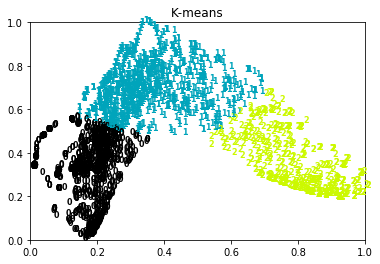

In [29]:
#Normalización para visualización :
x_min, x_max = np.min(beer_red, axis=0), np.max(beer_red, axis=0)
beer_red = (beer_red - x_min)/(x_max - x_min)
n_samples = beer_red.shape[0]

from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++',n_clusters=3)
kmeans.fit(beer_red)

#Visualización
for i in range(n_samples):
    plt.text(beer_red[i,0], beer_red[i,1],str(kmeans.labels_[i]),
    color=plt.cm.spectral(kmeans.labels_[i]/3),
    fontdict={'weight': 'bold', 'size': 8})

plt.title("K-means")
plt.show()



**Minibatch K-MEANS**:

Es una variación del algoritmo de K-means que se usa pequeños lotes "mini-batches" de datos para correr k-means cuando la colección de datos es muy grande para que quepa en memoria. => Arreglar, naa ke ver la wea

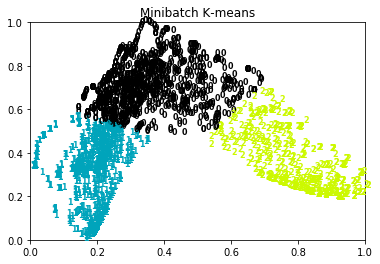

In [31]:
from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(init='k-means++',n_clusters=3)
mini_kmeans.fit(beer_red)

for i in range(n_samples):
    plt.text(beer_red[i,0], beer_red[i,1],str(mini_kmeans.labels_[i]),
    color=plt.cm.spectral(mini_kmeans.labels_[i]/3),
    fontdict={'weight': 'bold', 'size': 8})

plt.title("Minibatch K-means")
plt.show()


**HAC Complete**
Hierarchical Agglomerative Clustering

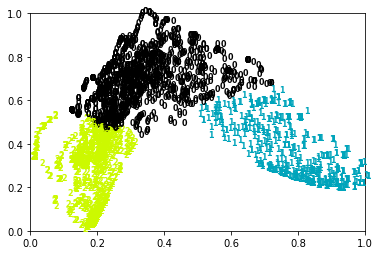

In [34]:
from sklearn.cluster import AgglomerativeClustering as hac
hac = hac(linkage="complete", n_clusters=3, affinity="euclidean")
hac.fit(beer_red)

for i in range(n_samples):
	plt.text(beer_red[i,0], beer_red[i,1], str(hac.labels_[i]),
	color=plt.cm.spectral(hac.labels_[i]/3.),
	fontdict={'weight': 'bold', 'size': 8})

plt.show()

**DBSCAN**

/home/fabian/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


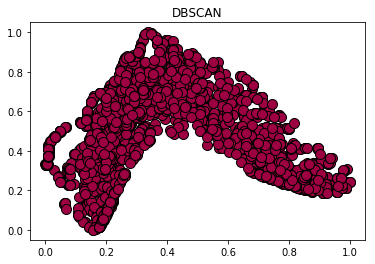

In [38]:
import numpy, scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

db = DBSCAN(eps=0.3, min_samples=10).fit(beer_red)
core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'
	class_member_mask = (labels == k)
	xy = beer_red[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
	xy = beer_red[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    
plt.title("DBSCAN")
plt.show()

**Ward**

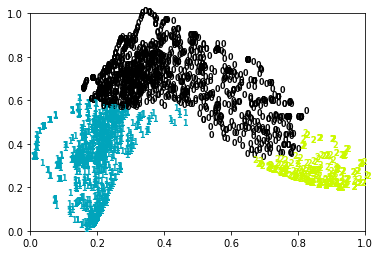

In [41]:
from sklearn.cluster import AgglomerativeClustering as ward
ward = ward(linkage="ward", n_clusters=3, affinity="euclidean")
ward.fit(beer_red)

for i in range(n_samples):
	plt.text(beer_red[i,0], beer_red[i,1], str(ward.labels_[i]),
	color=plt.cm.spectral(ward.labels_[i]/3.),
	fontdict={'weight': 'bold', 'size': 8})

plt.show()

TODO/ Mostrar una visualización por cada algoritmo
, Realizar ajustes a los parámentros para lograr un buen cluster
..JUSTIFICAR PROCEDIMIENTO Y ELECCIÓN DE PARÁMETROS.

Encontrar el atributo que mejor representa el cluster, nombre de cervecería ó tipo de cerveza?